In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20192.L3/master/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources
endpoint https://m3g87w9l3k.execute-api.us-west-2.amazonaws.com/dev/rlxmooc


### Objetivos del módulo

Conocer la estructura de árbol y de árbol binario, su representación y forma de manipularlos

### Preguntas básicas

- ¿Qué es un árbol, sus estructuras y características?
- ¿Cómo se representa y se implementa?
- ¿Cómo se puede recorrer un árbol?
- ¿Cómo se puede explotar un árbol binario para ordenar un vector?


Un árbol es un conjunto de $n$ registros ($n > 0$, árbol vacío no está definido), tales que hay un registro especial llamado raíz y los demás registros están particionados en conjuntos disjuntos, cada uno de los cuales es también un árbol.

De la definición se desprende que un árbol es una estructura recursiva, además cada registro se podrá considerar como la raíz de un sub-árbol. Es decir, un árbol está compuesto de árboles. Un ejemplo de un árbol se presenta en la figura 
siguiente


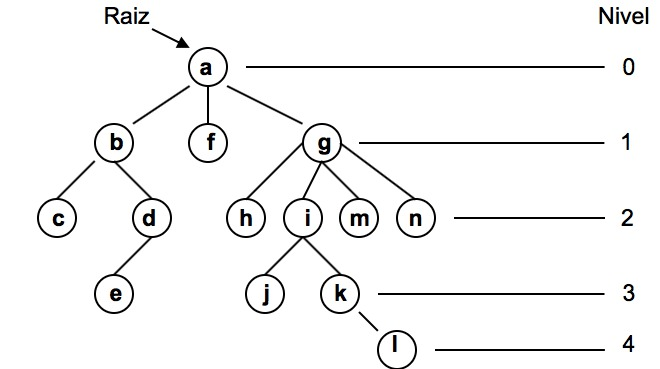

In [2]:
from IPython.display import Image
Image(filename='local/imgs/arbol.jpg', width=500) 

En esta figura se tiene el árbol cuya raíz es **a**. Dicho árbol está compuesto por el árbol cuya raíz es **b**, el árbol cuya raíz es **f** y el árbol cuya raíz es **g**. A su vez, **b** está compuesto por el árbol cuya raíz es **c** y el árbol cuya raíz es **d**. Y así sucesivamente. Es supremamente importante entender esta parte de la definición.

### Terminología

Las ramificaciones de cada nodo o registro suelen llamarse **hijos** y los nodos de los cuales salen las ramificaciones se llaman **padres**. Los registros que tienen un mismo padre se denominan **hermanos**.

- **Grado de un registro**: Es el número de ramificaciones que salen de ese registro. En el ejemplo de la figura se tiene: a tiene grado 3, b tiene grado 2, j tiene grado 0.
- **Grado de un árbol**: Es el máximo grado de cualquier registro del árbol. El árbol de la figura anterior tiene grado 4, ya que el registro que contiene la g tiene grado 4 y es el registro que mayor grado tiene..

- **Hojas**: Son los registros con grado cero (registros que no tienen hijos). En el árbol de la figura anterior las hojas son los registros que tienen los datos f, c, h, m, n, e, j, l.

A la **raíz** se le asigna el **nivel 0**, a sus hijos el **nivel 1**, a sus nietos el **nivel 2** y así sucesivamente.

Para un registro que se halle en un nivel i cualquiera, su padre se  halla  en  el  nivel i – 1, y sus hijos en el nivel i + 1.

- **Altura de un Arbol**: Es el máximo nivel de cualquier registro del árbol. En el ejemplo de la figura anterior la altura es 4 ya que el registro que tiene la l está en el nivel 4 y ese es el máximo nivel del árbol.

- **Ancestros de un Registro x**: Son todos los registros en la trayectoria desde la raíz hasta x. Los ancestros de d son a, b y d.

En general, los árboles en los cuales cualquier registro puede tener cualquier cantidad de hijos, se denominan **árboles n-arios**.

Adicionalmente, cada nodo puede contenter un dato. Los nodos **hoja** tienen necesariamente que contenter un dato.

### Construcción

Creemos una estructura básica para construir árboles. Observa la recursividad en la función `to_indented_string`

In [0]:
class TreeNode1(object):
    
    def __init__(self, value=None):
        self.value = value
        self.children = []
        
    def add_child(self, node):
        self.children.append(node)
        return self
        
    def to_indented_string(self, level):
        s = " "*level*2 + str(self.value)+"\n"
        if len(self.children)>0:
            s += "".join([i.to_indented_string(level+1) for i in self.children])
        return s
    
    def __repr__(self):
        return self.to_indented_string(level=0)

In [4]:
t = TreeNode1(1).add_child(TreeNode1(11).add_child(TreeNode1(111)).add_child(TreeNode1(112))).add_child(TreeNode1(12))
t

1
  11
    111
    112
  12

In [5]:
t = TreeNode1("a").\
        add_child(TreeNode1("b").\
            add_child(TreeNode1("c")).\
            add_child(TreeNode1("d").\
              add_child(TreeNode1("e")))).\
        add_child(TreeNode1("f")).\
        add_child(TreeNode1("g").\
            add_child(TreeNode1("h")).\
            add_child(TreeNode1("i").\
              add_child(TreeNode1("j")).
              add_child(TreeNode1("k").\
                add_child(TreeNode1("l")))).\
            add_child(TreeNode1("m")).\
            add_child(TreeNode1("n")))
t

a
  b
    c
    d
      e
  f
  g
    h
    i
      j
      k
        l
    m
    n

### Operaciones

creamos varios métodos recursivos:

- para contar el número de hojas 
- para calcular la altura del árbol 
- para calcular el grado del árbol

In [0]:
class TreeNode2(TreeNode1):
    
    def count_leaves(self):
        if len(self.children)==0:
            return 1
        return sum([i.count_leaves() for i in self.children])
    
    def height(self):
        import numpy as np
        if len(self.children)==0:
            return 0
        return np.max([i.height() for i in self.children])+1
    
    def grade(self):
        import numpy as np        
        return np.max([len(self.children)]+[i.grade() for i in self.children])

In [7]:
t = TreeNode2(1).add_child(TreeNode2(11).add_child(TreeNode2(111)).add_child(TreeNode2(112))).add_child(TreeNode2(12))
print(t)
print("nb leaves", t.count_leaves())
print("height   ", t.height())
print("grade    ", t.grade())

1
  11
    111
    112
  12

nb leaves 3
height    2
grade     2


In [0]:
t = TreeNode2("a").\
        add_child(TreeNode2("b").\
            add_child(TreeNode2("c")).\
            add_child(TreeNode2("d").\
              add_child(TreeNode2("e")))).\
        add_child(TreeNode2("f")).\
        add_child(TreeNode2("g").\
            add_child(TreeNode2("h")).\
            add_child(TreeNode2("i").\
              add_child(TreeNode2("j")).
              add_child(TreeNode2("k").\
                add_child(TreeNode2("l")))).\
            add_child(TreeNode2("m")).\
            add_child(TreeNode2("n")))

In [9]:
print("nb leaves", t.count_leaves())
print("height   ", t.height())
print("grade    ", t.grade())

nb leaves 8
height    4
grade     4


## Árboles binarios

Un árbol binario es un conjunto de n registros ($n \ge 0$), el cual, puede ser vacío o constar de una raíz y los demás registros particionados en dos conjuntos disjuntos, cada uno de los cuales es un árbol binario (definición recursiva), que se conocen como sub-árbol izquierdo y sub-árbol derecho. El siguiente es un ejemplo:

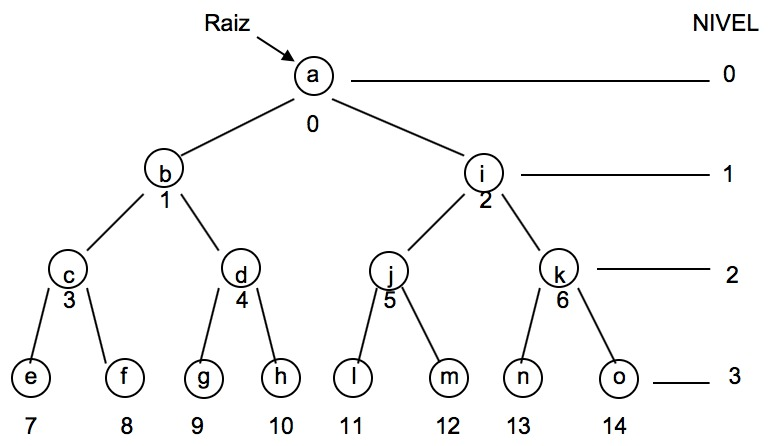

In [11]:
from IPython.display import Image
Image(filename='local/imgs/arbol_binario.jpg', width=500)

**Propiedades**

1. El máximo número de registros en un nivel $n$ cualquiera es $2^n$

2. Para un árbol binario de altura $k$ el máximo número de registros es $2^{k+1} – 1$ 

2. **Arbol Lleno**: Es un árbol binario de altura $k$ que tiene $2^{k+1} – 1$ registros.

3. Sea
    - $n_0$ = Número de hojas del árbol (registros con grado 0).
    - $n_2$ = Número de registros con grado 2.

       En un árbol lleno se cumple que $n_0 = n_2 + 1$. En el ejemplo de la figura 11.1 $n_2 = 7$ y $n_0 = 8$  
          


**Representación como vector**

Podemos representar un árbol binario con un vector, ya que cualquier nivel tiene un número de nodos conocido. Por ejemplo el árbol anterior

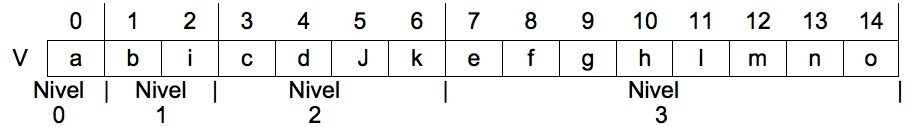

In [13]:
from IPython.display import Image
Image(filename='local/imgs/arbol_binario_vector.jpg', width=500)

observa que:

- si algún nodo sólo tiene un hijo, el faltante se representará como `None`
- el último nivel ha de tener $2^{k-1}$ valores (con $k$: la altura del árbol)
- si el último nivel tiene menos valores se asumen los faltantes como `None`

**Propiedades de la Representación de un Árbol Binario en un Vector**

Para un registro en la posición $i$ del vector:
    
- Su nivel es 

$$level(i) = \text{max}\;n\;\Big |\;\sum_{j=0}^n 2^j < i$$

- Su padre se halla en la posición $\frac{i-1}{2}$ del vector ($i  \ge  1$ división entera)

- Su hijo izquierdo se halla en  la  posición $2i+1$ (siempre y cuando $i$ no sea hoja).

- Su hijo derecho se halla en la posición $2i + 2$ (siempre y cuando $i$ no sea hoja).


In [0]:
import numpy as np
class VBinTree(object):
    
    def __init__(self, v):
        self.v = v
        
    def get_height(self):
        i,c=0,0
        while c<len(self.v):
            c += 2**i
            i += 1
        return i-1
    
    def get_level(self, i):
        n = 0
        while sum([2**j for j in range(n)])<=i:
            n+=1
        return n-1
    
    def get_children_positions(self, i):
        return (2*i+1 if 2*i+1<len(self.v) else None,\
                2*i+2 if 2*i+2<len(self.v) else None)
    
    def get_parent_position(self, i):
        assert type(i)==int and i>=0
        return (i-1)/2 if i!=0 else None

    def get_sibling_position(self, i):
        if i==0:
            return None
        return [k for k in self.get_children_positions(self.get_parent_position(i)) if k!=i][0]
  

    def to_indented_string(self, i, level):
        c = self.get_children_positions(i)
        s = (" "*2*level + str(self.v[i]) + "\n") if self.v[i] is not None else ""
        s += self.to_indented_string(c[0],level+1) if c[0] is not None else ""
        s += self.to_indented_string(c[1],level+1) if c[1] is not None else ""
        return s
    
    def __repr__(self):
        return self.to_indented_string(0,0)

In [15]:
v = ["a", "b", "i", "c", "d", "j", "k", "e", "f", "g", "h", "l", "m", "n", "o"]

b = VBinTree(v)

print("  node value  height     children parent")
for i in range(len(v)):
    print("%5d"%i, "%5s"%str(b.v[i]), "%5d"%b.get_level(i), \
          "%15s"%str(b.get_children_positions(i)), \
          "%5s"%str(b.get_parent_position(i)), \
          str(b.get_sibling_position(i)))

  node value  height     children parent
    0     a     0          (1, 2)  None None
    1     b     1          (3, 4)   0.0 2.0
    2     i     1          (5, 6)   0.5 3.0
    3     c     2          (7, 8)   1.0 4.0
    4     d     2         (9, 10)   1.5 5.0
    5     j     2        (11, 12)   2.0 6.0
    6     k     2        (13, 14)   2.5 7.0
    7     e     3    (None, None)   3.0 8.0
    8     f     3    (None, None)   3.5 9.0
    9     g     3    (None, None)   4.0 10.0
   10     h     3    (None, None)   4.5 11.0
   11     l     3    (None, None)   5.0 12.0
   12     m     3    (None, None)   5.5 13.0
   13     n     3    (None, None)   6.0 14.0
   14     o     3    (None, None)   6.5 None


In [16]:
b

a
  b
    c
      e
      f
    d
      g
      h
  i
    j
      l
      m
    k
      n
      o

fíjate como también podemos definir un árbol binario **no completo**, es decir, algunos nodos sólo tienen uno o ningún hijo

In [17]:
v = ["a", "b", "l", "c", "d", "k", "m", "e", None, "f", None, "j", None, "n", "o", "g", "h", None, None, 
    None, None, None, None, None, None, None, None, None, None, None, "p", None, None,None,"i"]
b = VBinTree(v)
print(b.get_height())
b

5


a
  b
    c
      e
        g
        h
          i
    d
      f
  l
    k
      j
    m
      n
      o
        p

### algoritmos de recorrido

en función de cómo se recorre cada nodo respecto a sus hijos

- IRD (Izquierdo, Raíz, Derecho) $\rightarrow$ **INORDEN**

- IDR (Izquierdo, Derecho, Raíz) $\rightarrow$ **POSORDEN**

- RID (Raíz, Izquierdo, Derecho) $\rightarrow$ **PREORDEN**

Fíjate en la recursividad de los algoritmos implementados más abajo.

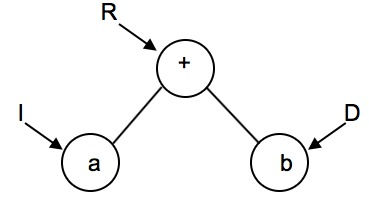

In [19]:
from IPython.display import Image
Image(filename='local/imgs/binnode.jpg', width=300)

In [0]:
class VBinTree2(VBinTree):

    def ird(self, i=0):
        if self.v[i]==None:
            return ""
        c = self.get_children_positions(i)
        s1 = self.ird(c[0]) if c[0] is not None else ""
        s2 = self.ird(c[1]) if c[1] is not None else ""
        return s1+str(self.v[i])+s2

    def idr(self, i=0):
        if self.v[i]==None:
            return ""
        c = self.get_children_positions(i)
        s1 = self.idr(c[0]) if c[0] is not None else ""
        s2 = self.idr(c[1]) if c[1] is not None else ""
        return s1+s2+str(self.v[i])    
    
    def rid(self, i=0):
        if self.v[i]==None:
            return ""
        c = self.get_children_positions(i)
        s1 = self.rid(c[0]) if c[0] is not None else ""
        s2 = self.rid(c[1]) if c[1] is not None else ""
        return str(self.v[i])+s1+s2

In [0]:
v = ["a", "b", "l", "c", "d", "k", "m", "e", None, "f", None, "j", None, "n", "o", "g", "h", None, None, 
    None, None, None, None, None, None, None, None, None, None, None, "p", None, None,None,"i"]
b = VBinTree2(v)

In [22]:
print(b.ird())
print(b.idr())
print(b.rid())

gehicbfdajklnmop
gihecfdbjknpomla
abceghidflkjmnop
